In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

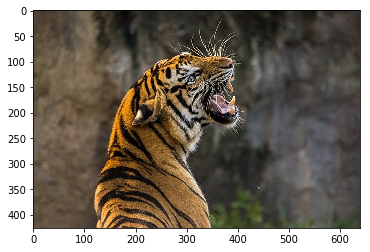

In [17]:
img = cv2.imread("image1.jpg")
plt.imshow(img[:,:,::-1])

In [18]:
blob = cv2.dnn.blobFromImage(img,0.017,(224,224),[104,117,124],swapRB=False,crop=False)

In [19]:
net = cv2.dnn.readNetFromCaffe('DenseNet_121.prototxt','DenseNet_121.caffemodel')

In [20]:
net.setInput(blob)
detections = net.forward()

In [21]:
detections_final = detections[0]
detections_final = detections_final.reshape(1000,1)

In [22]:
label_id = np.argmax(detections_final)

In [23]:
def get_prediction_score_probability(probs):
    prediction_score_probability = np.exp(probs) / np.sum(np.exp(probs))
    label = labels[np.argmax(prediction_score_probability)]
    return np.max(prediction_score_probability), label

In [24]:
print(get_prediction_score_probability(detections_final))

(0.9379335, 'tiger, Panthera tigris\n')
